In [5]:
from google.colab import files
uploaded = files.upload()

Saving sixclass.csv to sixclass (2).csv


In [109]:
import pandas as pd

df = pd.read_csv("sixclass.csv")
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [110]:
import numpy as np

In [111]:
df.rename(columns={'Spectral Class': 'SpectralClass'}, inplace=True)
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,SpectralClass
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [112]:
def funct(df):
  return (sum(df.loc[df['SpectralClass'] == 'M'].shape), sum(df.loc[df['SpectralClass'] == 'M']['Temperature (K)']) / sum(df.loc[df['SpectralClass'] == 'M'].shape))
print(funct(df))

(118, 3064.101694915254)


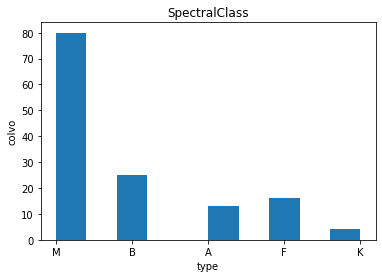

In [131]:
import matplotlib.pyplot as plt
plt.title("SpectralClass")
plt.hist(df['SpectralClass'])
plt.ylabel("colvo")
plt.xlabel("type")
plt.show()

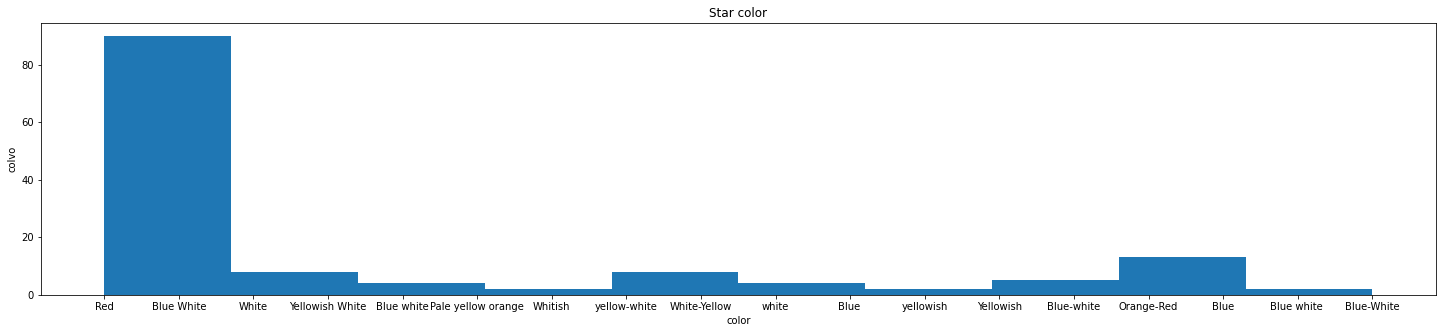

In [130]:
plt.figure(figsize=(25, 5))
plt.hist(df['Star color'])
plt.title("Star color")
plt.ylabel("colvo")
plt.xlabel("color")
plt.show()

In [115]:
print(df.shape)
print(df.dtypes)

(240, 7)
Temperature (K)             int64
Luminosity(L/Lo)          float64
Radius(R/Ro)              float64
Absolute magnitude(Mv)    float64
Star type                   int64
Star color                 object
SpectralClass              object
dtype: object


In [116]:
print(df.isna().sum())
df = df.dropna(axis=0, how='any')
df

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
SpectralClass             0
dtype: int64


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,SpectralClass
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [117]:
df = df.loc[df['Absolute magnitude(Mv)'] >= 0]
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,SpectralClass
0,3068,0.002400,0.17000,16.120,0,Red,M
1,3042,0.000500,0.15420,16.600,0,Red,M
2,2600,0.000300,0.10200,18.700,0,Red,M
3,2800,0.000200,0.16000,16.650,0,Red,M
4,1939,0.000138,0.10300,20.060,0,Red,M
...,...,...,...,...,...,...,...
207,23092,0.001320,0.01040,10.180,2,Blue,B
208,17920,0.001110,0.01060,11.660,2,Blue,B
209,19360,0.001250,0.00998,11.620,2,Blue,B
211,10012,552.000000,5.85600,0.013,3,Blue-white,A


In [118]:
df['SpectralClass'].unique()

array(['M', 'B', 'A', 'F', 'K'], dtype=object)

In [119]:
mm = sum(df.loc[df['SpectralClass'] == 'M']['Temperature (K)']) / sum(df.loc[df['SpectralClass'] == 'M'].shape)
bb = sum(df.loc[df['SpectralClass'] == 'B']['Temperature (K)']) / sum(df.loc[df['SpectralClass'] == 'B'].shape)
aa = sum(df.loc[df['SpectralClass'] == 'A']['Temperature (K)']) / sum(df.loc[df['SpectralClass'] == 'A'].shape)
ff = sum(df.loc[df['SpectralClass'] == 'F']['Temperature (K)']) / sum(df.loc[df['SpectralClass'] == 'F'].shape)
kk = sum(df.loc[df['SpectralClass'] == 'K']['Temperature (K)']) / sum(df.loc[df['SpectralClass'] == 'K'].shape)

In [120]:
df['new'] = sum(df.iloc[:, 0])/216
df.loc[(df.SpectralClass == 'M'), ('new')] = mm
df.loc[(df.SpectralClass == 'B'), ('new')] = bb
df.loc[(df.SpectralClass == 'A'), ('new')] = aa
df.loc[(df.SpectralClass == 'F'), ('new')] = ff
df.loc[(df.SpectralClass == 'K'), ('new')] = kk
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,SpectralClass,new
0,3068,0.002400,0.17000,16.120,0,Red,M,2888.172414
1,3042,0.000500,0.15420,16.600,0,Red,M,2888.172414
2,2600,0.000300,0.10200,18.700,0,Red,M,2888.172414
3,2800,0.000200,0.16000,16.650,0,Red,M,2888.172414
4,1939,0.000138,0.10300,20.060,0,Red,M,2888.172414
...,...,...,...,...,...,...,...,...
207,23092,0.001320,0.01040,10.180,2,Blue,B,12932.500000
208,17920,0.001110,0.01060,11.660,2,Blue,B,12932.500000
209,19360,0.001250,0.00998,11.620,2,Blue,B,12932.500000
211,10012,552.000000,5.85600,0.013,3,Blue-white,A,5875.950000
